In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메세지
import warnings
warnings.simplefilter("ignore")

In [3]:
#생성
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# 수치형 기술 통계 값
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1) boxplot

<AxesSubplot:>

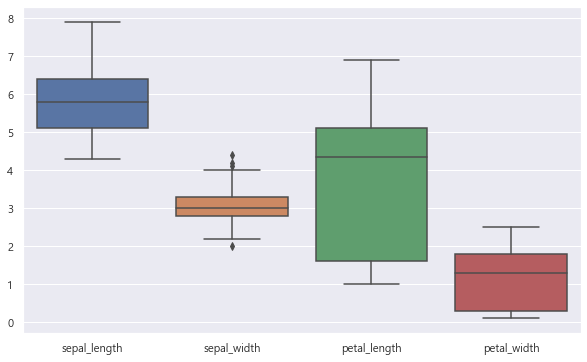

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=iris_df)

<AxesSubplot:>

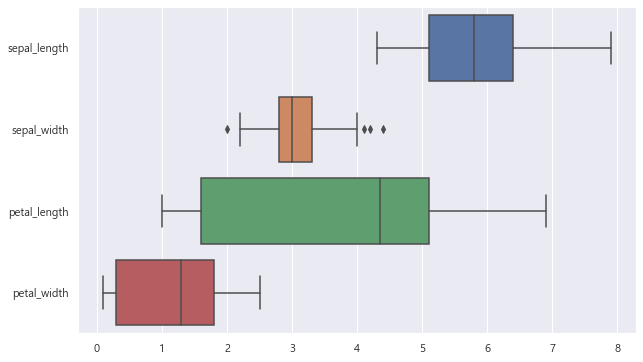

In [8]:
# orient='h' : 수평
plt.figure(figsize=(10,6))
sns.boxplot(data=iris_df, orient='h')

## 2) swarmplot : 모든 데이터를 점을 찍어 표시

<AxesSubplot:>

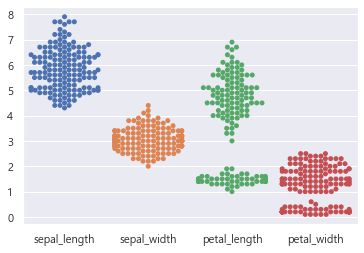

In [9]:
sns.swarmplot(data=iris_df)

<AxesSubplot:>

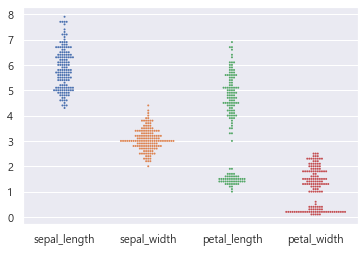

In [10]:
sns.swarmplot(data=iris_df, size=2)

## 3) catplot

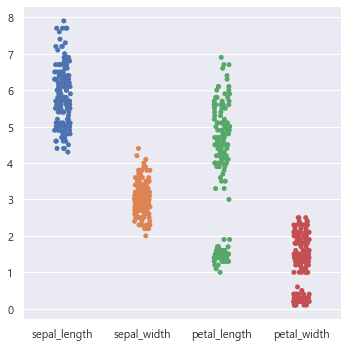

In [11]:
sns.catplot(data=iris_df)

## 4) violinplot

<AxesSubplot:>

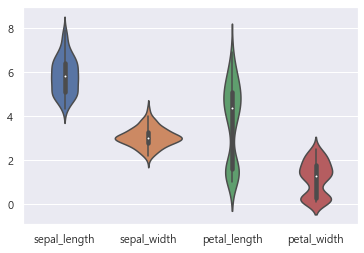

In [12]:
sns.violinplot(data=iris_df)

## 5) stripplot : catplot과 비슷한 모양

<AxesSubplot:>

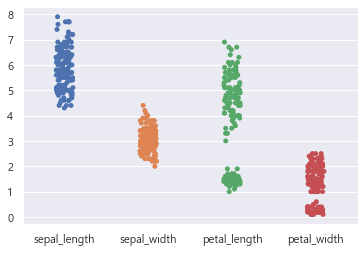

In [13]:
sns.stripplot(data=iris_df)

## 6) countplot

In [14]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [16]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 1) 성별 차트
- pandas

In [19]:
# 그룹잡기
titanic_df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [20]:
titanic_df.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

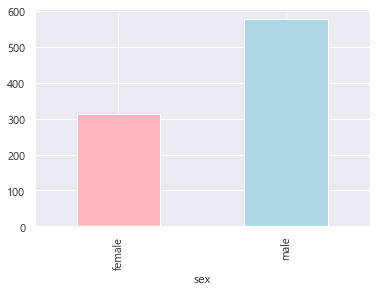

In [22]:
titanic_df.groupby('sex')['sex'].count().plot.bar(color=['lightpink','lightblue'])

- seaborn

<AxesSubplot:xlabel='sex', ylabel='count'>

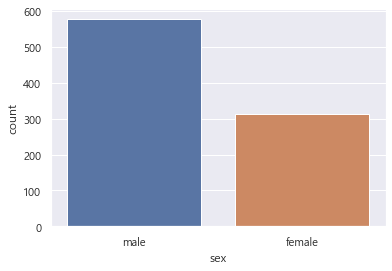

In [23]:
sns.countplot(data=titanic_df, x='sex')

<AxesSubplot:xlabel='count', ylabel='sex'>

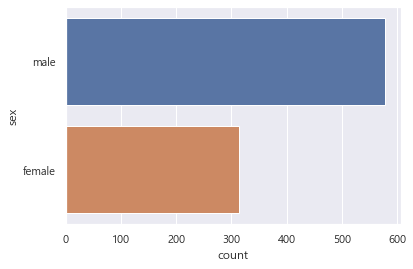

In [24]:
sns.countplot(data=titanic_df, y='sex')

### 2) 성별 인원수를 객실 등급별로 시각화

- pandas

In [25]:
# 성별 객실 등급 
titanic_df.groupby(['sex','class'])['sex'].count()

sex     class 
female  First      94
        Second     76
        Third     144
male    First     122
        Second    108
        Third     347
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex,class'>

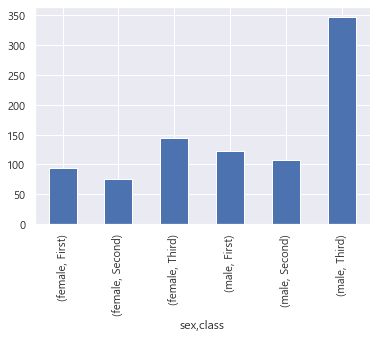

In [26]:
titanic_df.groupby(['sex','class'])['sex'].count().plot.bar()

- seaborn

<AxesSubplot:xlabel='sex', ylabel='count'>

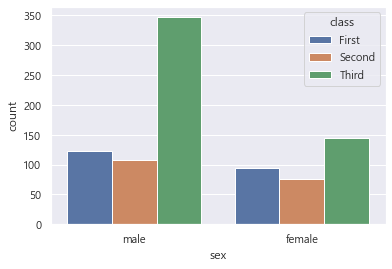

In [27]:
sns.countplot(data=titanic_df,x='sex', hue='class')

<AxesSubplot:xlabel='sex', ylabel='count'>

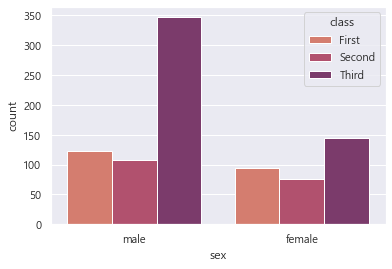

In [28]:
sns.countplot(data=titanic_df,x='sex', hue='class', palette='flare')

In [29]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 요일별 팁을 준 횟수 시각화

<AxesSubplot:xlabel='day', ylabel='count'>

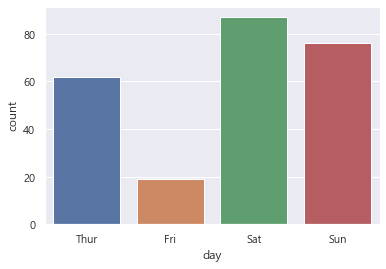

In [31]:
sns.countplot(data=tips_df, x='day')